# Assignment 5:  Due 10/7

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [2]:
data = pd.read_csv('data/nobel.csv')

# 1b)

Display below the output from the DataFrame functions *info*.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


# 1c)

Show the first 5 listings of the dataset.

In [4]:
data.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [5]:
#This creates a dataframe where the columns sum up the total number of null values in the column as it goes down
nulls = data.isnull().sum()
nulls

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
#Sums up the final row of the bool_sum dataframe
np.sum(nulls)

1912

# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

In [7]:
data.groupby('year').count()['prize']

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2012    10
2013    13
2014    13
2015    11
2016    11
Name: prize, Length: 113, dtype: int64

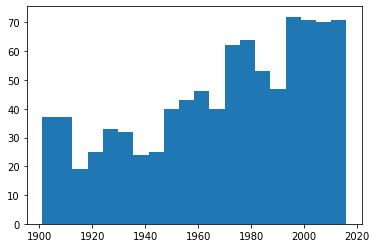

In [8]:
plt.hist(data['year'],bins=20);

1910s were the decade with least prizes awarded

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [9]:
data.groupby('category').count()['prize']

category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
Name: prize, dtype: int64

Medicine has the most prizes

# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [10]:
100 * ( data.groupby('prize_share').count()['prize'] / len(data) )

prize_share
1/1    37.760703
1/2    33.589462
1/3    22.063666
1/4     6.586169
Name: prize, dtype: float64

# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the number of males and females that won the prize each year. 

In [11]:
sexdata = data.groupby('sex')
sexdata.count()['year']

sex
Female     49
Male      836
Name: year, dtype: int64

In [12]:
sexdata.sum()

,year,laureate_id
sex,,
Female,96998,30095
Male,1645643,375543


The sum of the male and female prizes does not add up to the total entries because there are some null entries in the dataframe in the sex category.

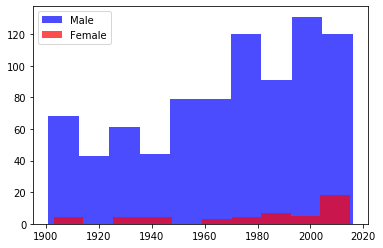

In [13]:
YrSxData = data[['year','sex']]
maleData = YrSxData[ YrSxData['sex'] == 'Male']['year']
femaleData = YrSxData[ YrSxData['sex'] == 'Female']['year']

sexfig = plt.figure('Male vs Female Prize Winners')
plt.hist(maleData,alpha=0.7,color='blue',label='Male')
plt.hist(femaleData,alpha=0.7,color='red',label='Female')
plt.legend()

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [14]:
(data['birth_country'] == 'United States of America').sum()

259

# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will return the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [15]:
ages = data['year'] - pd.DatetimeIndex(data['birth_date']).year

In [16]:
ages.describe()

count    883.000000
mean      59.453001
std       12.399290
min       17.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       90.000000
dtype: float64

/Users/jasonbreslin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jasonbreslin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   5.,  37.,  96., 145., 179., 196., 136.,  63.,  25.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

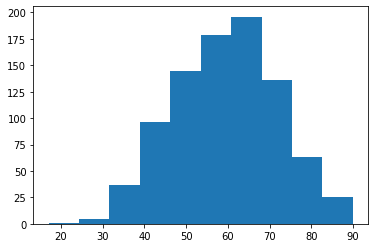

In [17]:
plt.hist(ages)

# Problem 9

Make a copy of the current DataFrame. Then drop the column *laureate_id* from the copied DataFrame (do this inplace so this column is gone).

In [22]:
data2 = data.copy()
data2.drop('laureate_id',axis=1,inplace=True)

In [23]:
data2

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [26]:
data['age'] = ages

In [29]:
data

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0
